In [3]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ... connected.


H2O cluster uptime:,1 min 01 secs
H2O cluster timezone:,Africa/Luanda
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.2
H2O cluster version age:,"28 days, 11 hours and 40 minutes"
H2O cluster name:,H2O_from_python_maria_fg5oet
H2O cluster total nodes:,1
H2O cluster free memory:,892 Mb
H2O cluster total cores:,0
H2O cluster allowed cores:,0
H2O cluster status:,"locked, healthy"


# Problem Statement

A company is trying to predict whether customers will order for goods on their mobile app or their website.

In [4]:
data = h2o.import_file("Ecommerce Customers")
data.head(5)# The default head() command displays the first 10 rows.

Parse progress: |█████████████████████████████████████████████████████████| 100%


Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
mstephenson@fernandez.com,"835 Frank Tunnel Wrightmouth, MI 82180-9605",Violet,34.4973,12.6557,39.5777,4.08262,587.951
hduke@hotmail.com,"4547 Archer Common Diazchester, CA 06566-8576",DarkGreen,31.9263,11.1095,37.269,2.66403,392.205
pallen@yahoo.com,"24645 Valerie Unions Suite 582 Cobbborough, DC 99414-7564",Bisque,33.0009,11.3303,37.1106,4.10454,487.548
riverarebecca@gmail.com,"1414 David Throughway Port Jason, OH 22070-1220",SaddleBrown,34.3056,13.7175,36.7213,3.12018,581.852
mstephens@davidson-herman.com,"14023 Rodriguez Passage Port Jacobville, PR 37242-1057",MediumAquaMarine,33.3307,12.7952,37.5367,4.44631,599.406


# Helpful features about H2o.AI
(http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/glm.html)

1) Standardization: The Standardization of numerical values is enabled by default. If you do not use standardization, the results can include components that are dominated by variables that appear to have larger variances relative to other attributes as a matter of scale, rather than true contribution. Only advanced users should disable this option.

2) Missing values handling: In H2O, the Deep Learning and GLM algorithms will either skip or mean-impute rows with NA values. This option defaults to MeanImputation. But you can select the skip option.

3) Unwanted Columns: The ignored_columns parameter is used to specify an array of column names that should be ignored.

4) Collinearity : Collinear columns can cause problems during model fitting. The preferred way to deal with collinearity (and the default H2O behavior) is to add regularization. However, if you want a non-regularized solution, you can choose to automatically remove collinear columns by enabling the "remove_collinear_columns" option. This option can only be used when solver=IRLSM and with no regularization (lambda=0).

In [38]:
# check the number of missing values
print('missing:', data.isna().sum())

missing: 0.0


In [6]:
data.describe()

Rows:504
Cols:8




,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
type,string,string,enum,real,real,real,real,real
mins,NaN,NaN,,29.532428967057943,8.508152176032603,33.91384724758464,0.2699010899842742,256.67058229005585
mean,NaN,NaN,,33.0485262783768,12.058543548324797,37.05977842753533,3.5391442739007943,499.72973848575486
maxs,NaN,NaN,,36.13966248879052,15.126994288792469,40.005181638101895,6.922689335035807,765.5184619388372
sigma,NaN,NaN,,0.9917277261077061,0.9937713490575559,1.0093853634694294,0.9981036761311914,79.20190023127178
zeros,0,0,,0,0,0,0,0
missing,0,0,0,0,0,0,0,0
0,mstephenson@fernandez.com,"835 Frank Tunnel Wrightmouth, MI 82180-9605",Violet,34.49726772511229,12.655651149166752,39.57766801952616,4.082620632952961,587.9510539684005
1,hduke@hotmail.com,"4547 Archer Common Diazchester, CA 06566-8576",DarkGreen,31.926272026360156,11.109460728682564,37.268958868297744,2.66403418213262,392.2049334443264
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582 Cobbborough, DC 99414-7564",Bisque,33.000914755642675,11.330278057777512,37.11059744212085,4.104543202376424,487.54750486747207


In [5]:
i_split = data.split_frame(ratios = [0.8], seed = 1234)
train = i_split[0] # using 80% for training
test = i_split[1] #rest 20% for testing
print(train.shape, test.shape)

(412, 8) (92, 8)


In [20]:
#predictors = list(data.columns) 
#predictors.remove('Yearly Amount Spent')  # Since we need to predict quality
#predictorsX = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [6]:
# set the predictor names and the response column name
predictors= ['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']
response = 'Yearly Amount Spent'

# split into train and validation sets
#train, valid= airlines.split_frame(ratios = [.8], seed = 1234)
i_split = data.split_frame(ratios = [0.8], seed = 1234)
train = i_split[0] # using 80% for training
test = i_split[1] #rest 20% for testing


In [37]:
# Import the function for GLM
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
# Set up GLM for regression
glm = H2OGeneralizedLinearEstimator(family = 'gaussian', model_id = 'glm_default', seed=101)
# Use .train() to build the model
glm.train(x = predictors, y = response, training_frame = train)
print(glm)

glm Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  glm_default


ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 117.69015885888226
RMSE: 10.848509522458938
MAE: 8.705021783158994
RMSLE: 0.023043859604485847
R^2: 0.9805143592183289
Mean Residual Deviance: 117.69015885888226
Null degrees of freedom: 411
Residual degrees of freedom: 407
Null deviance: 2488414.2119395323
Residual deviance: 48488.34544985949
AIC: 3145.6441756235995
Scoring History: 


,timestamp,duration,iterations,negative_log_likelihood,objective
,2019-05-02 11:53:50,0.000 sec,0,2488414.2428913,6039.8403954


In [27]:
glm.model_performance(test)


ModelMetricsRegressionGLM: glm
** Reported on test data. **

MSE: 107.00226498567814
RMSE: 10.344189914424335
MAE: 7.97503771943003
RMSLE: 0.02109659645191879
R^2: 0.9834809788953867
Mean Residual Deviance: 107.00226498567814
Null degrees of freedom: 137
Residual degrees of freedom: 134
Null deviance: 917888.4566935622
Residual deviance: 14766.312568023583
AIC: 1046.480335485797


In [24]:
y_pred = glm.predict(test)
y_pred.head(5)

glm prediction progress: |████████████████████████████████████████████████| 100%


predict
565.429
443.908
461.637
415.432
456.43


In [40]:
# Coefficients that can be applied to the non-standardized data.
print(glm.coef())

{'Intercept': -953.1137343684493, 'Avg. Session Length': 24.37358388794061, 'Time on App': 36.07544668780875, 'Time on Website': 0.14701057397898407, 'Length of Membership': 58.37160190373424}


In [41]:
# Coefficients fitted on the standardized data (requires standardize = True, which is on by default)
print(glm.coef_norm())


{'Intercept': 496.9119100576219, 'Avg. Session Length': 24.105640311998943, 'Time on App': 35.30801137045289, 'Time on Website': 0.14949588391068136, 'Length of Membership': 57.762508515604864}


In [43]:
# Print the Coefficients table
glm._model_json['output']['coefficients_table']

Coefficients: glm coefficients



names,coefficients,standardized_coefficients
Intercept,-953.1137344,496.9119101
Avg. Session Length,24.3735839,24.1056403
Time on App,36.0754467,35.3080114
Time on Website,0.1470106,0.1494959
Length of Membership,58.3716019,57.7625085


# Interpretation with Coefficients 


-Holding all other features fixed, a 1 unit increase in Avg. Session Length is associated with an increase of 24.10 total dollars spent.

-Holding all other features fixed, a 1 unit increase in Time on App is associated with an increase of 35.31 total dollars spent.

-Holding all other features fixed, a 1 unit increase in Time on Website is associated with an increase of 0.15 total dollars spent.

-Holding all other features fixed, a 1 unit increase in Length of Membership is associated with an increase of 57.76 total dollars spent.

# Advice to the Company

There are two ways to think about this: Develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better. This sort of answer really depends on the other factors going on at the company, you would probably want to explore the relationship between Length of Membership and the App or the Website before coming to a conclusion!

C:\Users\maria\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\maria\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\maria\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


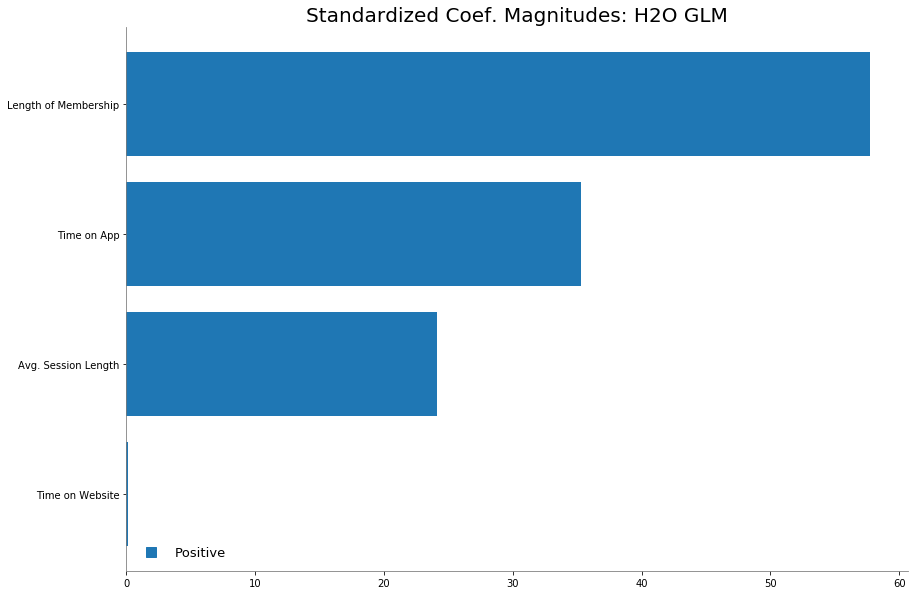

In [46]:
# Retrieve a graphical plot of the standardized coefficient magnitudes
glm.std_coef_plot()

# Linear regression ith H2OAutoML

In [7]:
from h2o.automl import H2OAutoML
aml = H2OAutoML(max_models = 20, max_runtime_secs=100, seed = 1) # default time is one hour

In [8]:
bml= aml.train(x=predictors, y=response, training_frame=train, validation_frame=test)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [10]:
print(aml.leaderboard)

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
GLM_grid_1_AutoML_20190515_130803_model_1,101.376,10.0686,101.376,8.04254,0.0208064
StackedEnsemble_AllModels_AutoML_20190515_130803,106.568,10.3232,106.568,8.29745,0.0217005
StackedEnsemble_BestOfFamily_AutoML_20190515_130803,107.865,10.3858,107.865,8.23957,0.0216734
DeepLearning_grid_1_AutoML_20190515_130803_model_1,146.883,12.1195,146.883,9.48636,0.0254495
DeepLearning_grid_1_AutoML_20190515_130803_model_3,228.652,15.1212,228.652,11.8869,0.0331941
DeepLearning_grid_1_AutoML_20190515_130803_model_2,260.867,16.1514,260.867,13.0717,0.0338416
GBM_3_AutoML_20190515_130803,293.517,17.1324,293.517,12.6414,0.0377495
GBM_4_AutoML_20190515_130803,304.071,17.4376,304.071,12.9557,0.0383573
GBM_2_AutoML_20190515_130803,307.056,17.523,307.056,13.0283,0.0387149
DeepLearning_1_AutoML_20190515_130803,450.528,21.2256,450.528,15.3175,0.0455554


In [1]:
#metalearners = h2o.get_model(aml.leader.metalearner()['name'])
#metalearners.std_coef_plot()

In [11]:
preds = aml.leader.predict(test)

glm prediction progress: |████████████████████████████████████████████████| 100%


In [12]:
preds.head(5)

predict
569.098
441.051
459.687
411.312
454.438


In [16]:
# Coefficients that can be applied to the non-standardized data.
print(aml.coef())

AttributeError: 'H2OAutoML' object has no attribute 'coef'